<a href="https://colab.research.google.com/github/FungGor/MachineLearning/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [18]:
#Get the stock quote
df = web.DataReader('TSM',data_source='yahoo',start='2015-01-01',end='2020-11-20')
df.shape

(1484, 6)

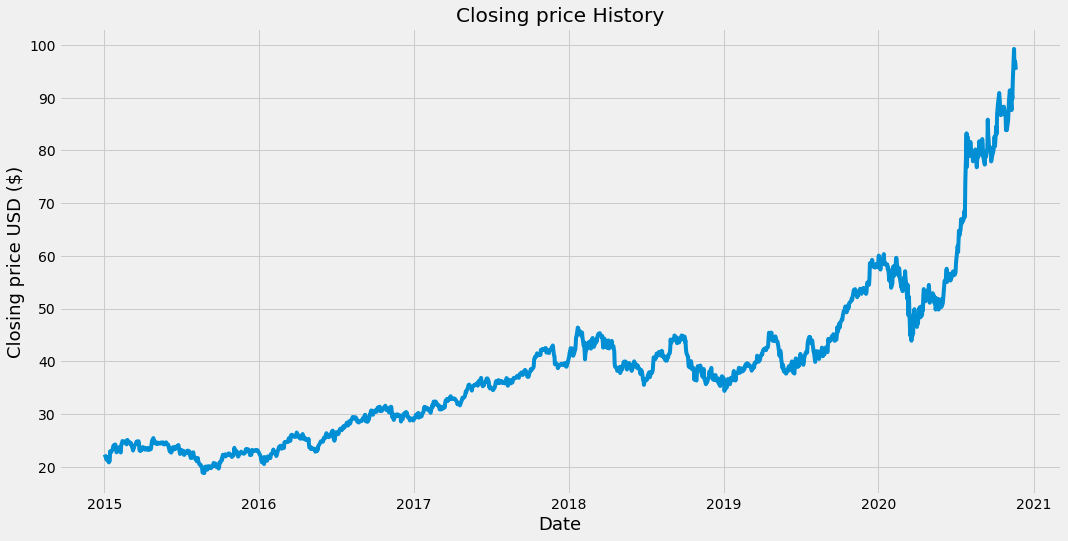

In [19]:
plt.figure(figsize=(16,8))
plt.title('Closing price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price USD ($)',fontsize=18)
plt.show()

In [22]:
#Create a new dataframe
data = df.filter(['Close'])
#Convert the dataframe into numpy array
dataset = data.values
#Get the number of rows to train the model 
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1188

In [23]:
#Scaler the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04372128],
       [0.03701403],
       [0.03229413],
       ...,
       [0.97093533],
       [0.96696067],
       [0.95106204]])

In [34]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train = []
y_train = [] 
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.04372128, 0.03701403, 0.03229413, 0.03614458, 0.03788348,
       0.0303068 , 0.02521427, 0.02844366, 0.02856787, 0.05129797,
       0.04769594, 0.05378214, 0.05527263, 0.06148303, 0.06496087,
       0.06707241, 0.06744504, 0.06421563, 0.05626631, 0.04906222,
       0.05191902, 0.05452738, 0.05986834, 0.060862  , 0.05390635,
       0.0485654 , 0.06334618, 0.06868713, 0.07092286, 0.07551857,
       0.07464912, 0.07390385, 0.07154391, 0.07055025, 0.06781765,
       0.07800274, 0.07800274, 0.07353124, 0.07166812, 0.07291019,
       0.07129549, 0.06918395, 0.07079865, 0.06620296, 0.05825364,
       0.0532853 , 0.05875046, 0.05924731, 0.06359457, 0.06856292,
       0.06893553, 0.07390385, 0.07328282, 0.07464912, 0.07502173,
       0.07129549, 0.05490002, 0.05514844, 0.05191902, 0.05576947])]
[0.058626251690192616]



In [36]:
#Convert x_train and y_train into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [39]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1128, 60, 1)

In [41]:
#Build the LSTM MODEL
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [42]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [43]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1128/1128 [==============================] - 27s 24ms/step - loss: 4.0938e-04


In [44]:
#Create the testing data set
test_data = scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [45]:
#Convert the data into numpy array
x_test = np.array(x_test)

In [46]:
#Reshape the data 
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [47]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [48]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.3736079705728067

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


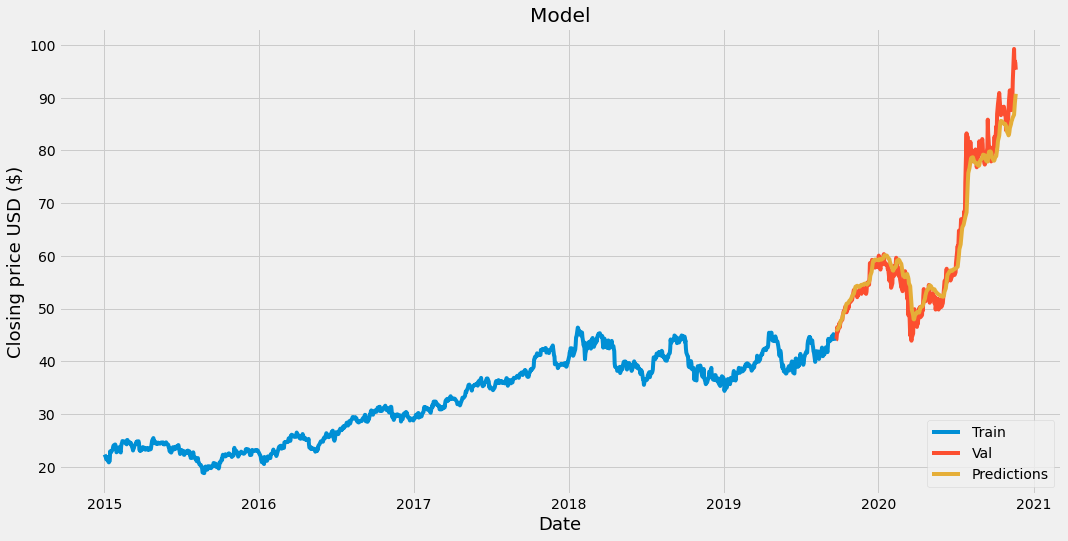

In [49]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()